In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline  

In [2]:
heart = pd.read_csv('./HeartDiseaseData.csv')
heart.head()

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [ ]:
# Посмотрим как устроен датафрейм:

In [3]:
heart.shape

(457, 14)

In [4]:
heart.dtypes

Unnamed: 0      int64
ID              int64
Age             int64
Sex            object
cp             object
trestbps      float64
chol          float64
fbs            object
restecg        object
thalach       float64
exang          object
oldpeak       float64
num             int64
Place          object
dtype: object

In [5]:
heart.describe()

,Unnamed: 0,ID,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,457.000000,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,229.000000,229.000000,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,132.068795,132.068795,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,1.000000,1.000000,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,115.000000,115.000000,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,229.000000,229.000000,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,343.000000,343.000000,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,457.000000,457.000000,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


In [ ]:
# Избавимся от колонок, не имеющих никакой предсказательной силы:

In [7]:
hearts = heart.drop(['Unnamed: 0', 'ID'], axis = 1)

In [8]:
hearts.isnull().sum()

Age          0
Sex          0
cp           0
trestbps    33
chol        26
fbs         54
restecg      2
thalach     33
exang       33
oldpeak     36
num          0
Place        0
dtype: int64

In [9]:
# Для численных значений заменю NaN на медиану, а для факторных отброшу строки с NaN

In [12]:
hearts_for_tree = hearts.fillna({'trestbps': hearts.trestbps.median(), 'chol': hearts.chol.median(), 'thalach': hearts.thalach.median(), 'oldpeak': hearts.oldpeak.median()})
hearts_for_tree = hearts_for_tree.dropna(axis = 0)
hearts_for_tree.isnull().sum()


Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
Place       0
dtype: int64

In [13]:
X = hearts_for_tree.drop("num", axis = 1)
y = hearts_for_tree.num

In [ ]:
# Разделим строковые колонки на несколько бинарных

In [14]:
X = pd.get_dummies(X)
X.shape

(369, 21)

In [15]:
# В датасете осталось 369 строк. Думаю, этого достаточно для обучения

In [16]:
ht_tree = tree.DecisionTreeClassifier(criterion='entropy')
ht_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
ht_tree.score(X, y)

1.0

In [18]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [19]:
from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

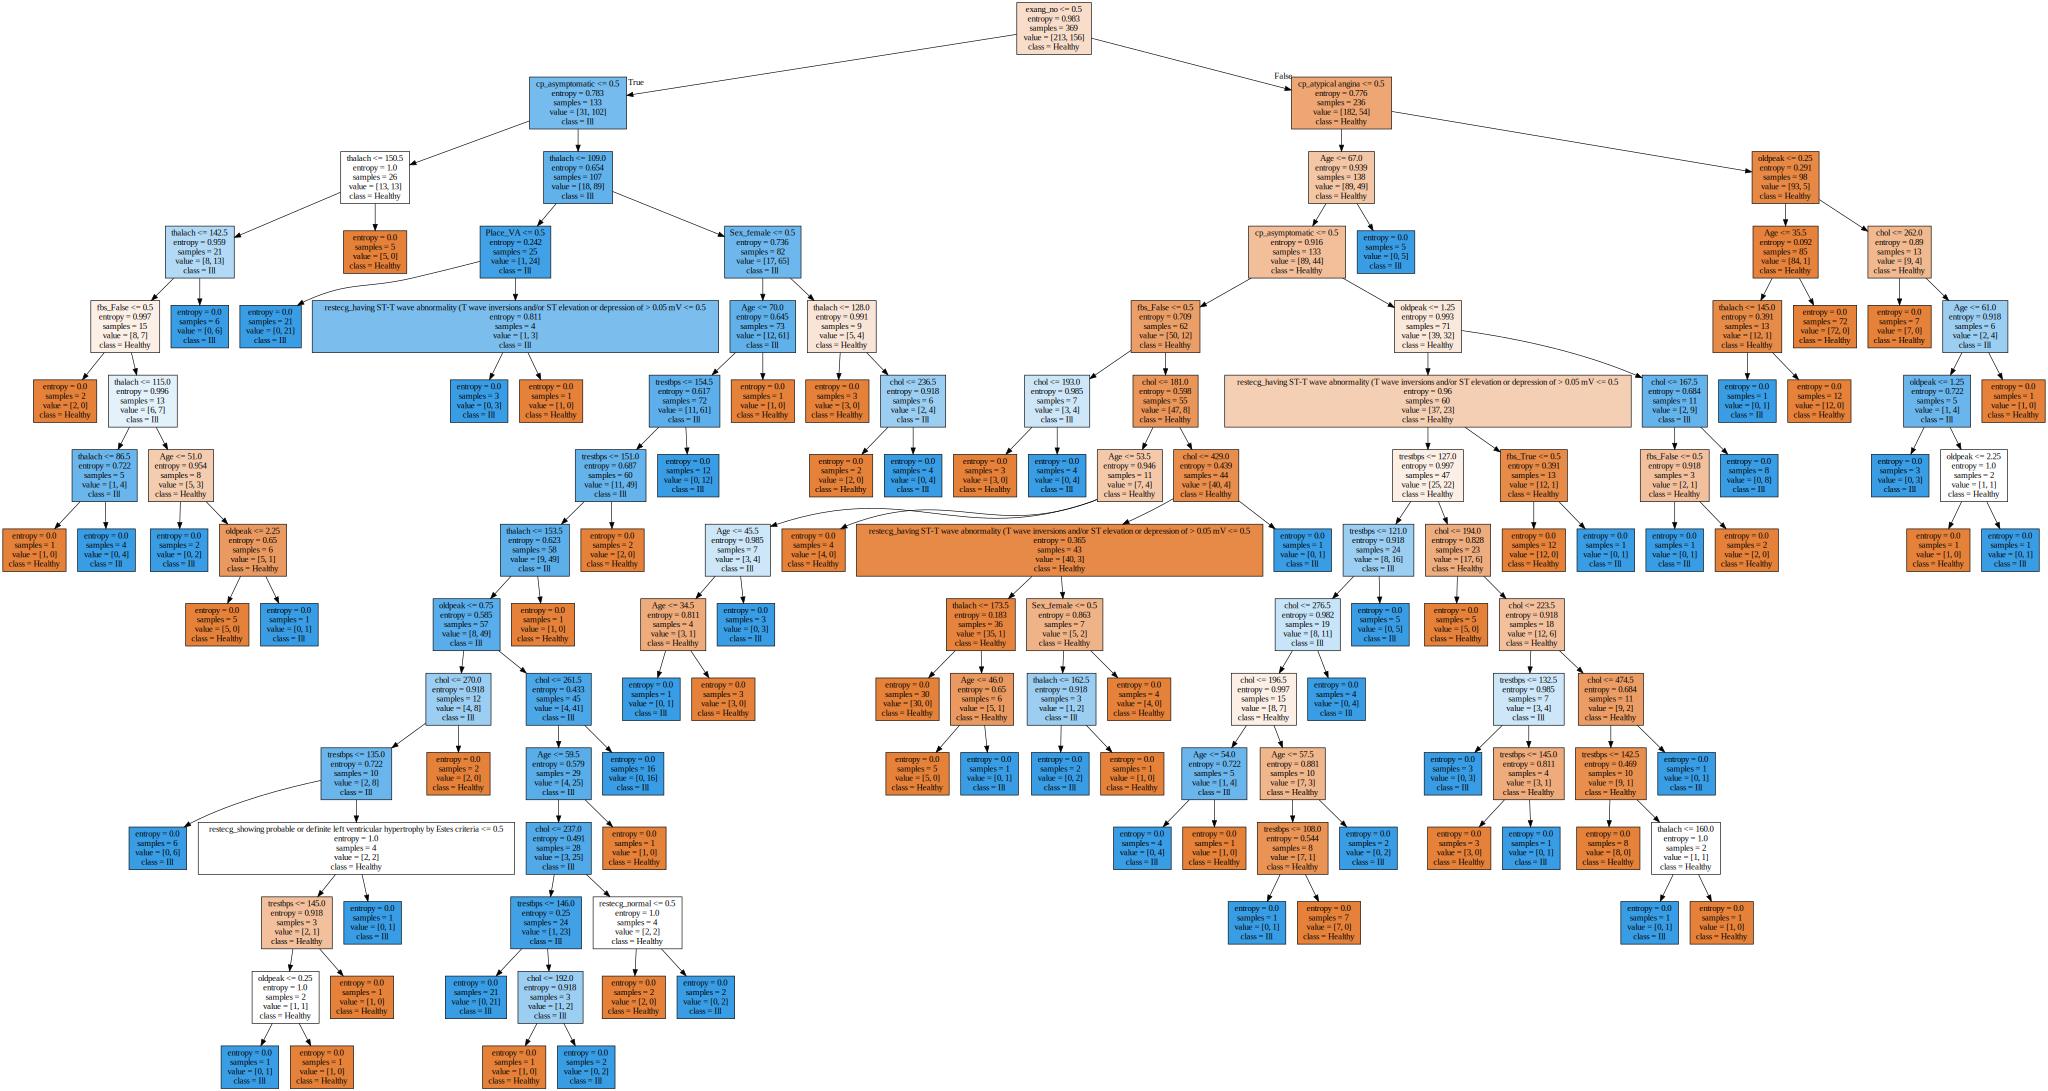

'./heart_tree.gv.pdf'

In [20]:
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(ht_tree, out_file=None
   , feature_names=list(X), class_names=['Healthy', 'Ill'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))
graph.render("./heart_tree.gv", view=True)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
ht_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
ht_tree.score(X_train, y_train)

1.0

In [24]:
ht_tree.score(X_test, y_test)

0.8032786885245902

In [ ]:
# Пробую уменьшить глубину дерева до 5:

In [25]:
ht_tree_5 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [26]:
ht_tree_5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
ht_tree_5.score(X_train, y_train)

0.8340080971659919

In [28]:
ht_tree_5.score(X_test, y_test)

0.7868852459016393

In [31]:
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(ht_tree_5, out_file=None
   , feature_names=list(X), class_names=['Ill', 'Healthy'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))
graph.render("./tree_5.gv", view=True)

'./tree_5.gv.pdf'

In [ ]:
# Выясним оптимальную глубину:

In [78]:
max_depth_values = range(1, 10)
classifier_score_data = pd.DataFrame()

In [81]:
for max_dept in max_depth_values:
    h_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    h_tree.fit(X_train, y_train)
    test_score = h_tree.score(X_test, y_test)
    train_score = h_tree.score(X_train, y_train)
    
    classifier_score_data = classifier_score_data \
        .append(pd.DataFrame({'test_score': [test_score], 'train_score': [train_score], 'max_dept': [max_dept]}))

In [82]:
classifier_score_data_1 = pd.melt(classifier_score_data,id_vars=['max_dept'], var_name='set_type', value_name='score')

In [85]:
classifier_score_data_1.head()

,max_dept,set_type,score
0,1,test_score,0.754098
1,2,test_score,0.754098
2,3,test_score,0.786885
3,4,test_score,0.770492
4,5,test_score,0.786885


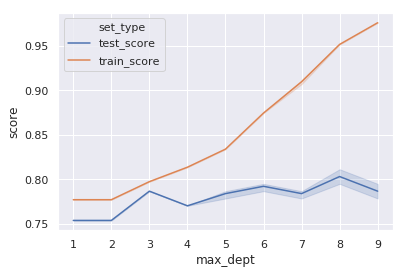

In [84]:
ax = sns.lineplot(x="max_dept", y="score",
                   hue="set_type", data=classifier_score_data_1) 

In [ ]:
# Глубина 3 выглядит наиболее подходящей, построим новое дерево с глубиной 3:

In [86]:
ht_tree_3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [87]:
ht_tree_3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
ht_tree_3.score(X_train, y_train)

0.7975708502024291

In [89]:
ht_tree_3.score(X_test, y_test)

0.7868852459016393

In [90]:
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(ht_tree_3, out_file=None
   , feature_names=list(X), class_names=['Ill', 'Healthy'] 
   , filled = True))
graph.render("./tree_3.gv", view=True)

'./tree_3.gv.pdf'

In [64]:
# Проводим кросс-валидацию:

In [92]:
from sklearn.model_selection import cross_val_score

In [94]:
heart_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
cross_val_scores = cross_val_score(heart_tree, X_train, y_train, cv=5)

In [95]:
cross_val_scores.mean()

0.7332721088435373